# First: explore the data
* In this section, I conducted Exploratory Data Analysis (EDA) to identify any data quality issues, which included examining the dataset size, data types, data visualizations, and more.
* I have summarized the data quality issues for each dataset in their respective markdown sections; please review them accordingly.
* Additionally, you can find the code supporting these conclusions and all relevant details below.

* Before reviewing the code, here are the conclusions that address the two questions posed in this section:

1. Generally, there are several key data quality issues present in these datasets.

    - __Missing values__: 
    There are missing values in several variables across each dataset. It is important to determine the best approach to handle these missing values. Possible solutions include filling them with the average, median, or mode. However, most missing values in these three datasets pertain to categorical data, such as users' STATE, GENDER, and LANGUAGE. This missing data must be handled carefully, as simply filling in these values with the mode may introduce significant bias or lead to misunderstandings.
    
    - __Duplicate values__: 
    There are duplicate entries in the 'Transaction' and Product' datasets. To avoid redundancy and potential errors during the merging process, I removed the duplicate rows from both the 'Transaction' and 'Product' datasets.

    - __Data types__: 
    Some variables in the "Transaction" dataset are assigned inappropriate data types, specifically 'BARCODE', 'FINAL_SALE', and 'FINAL_QUANTITY.' These data type issues can lead to incorrect results during analysis and may also result in inefficient memory usage.

    - __Data entry__: 
    I observed some data entry issues in the 'Transaction' dataset, specifically in 'FINAL_QUANTITY' and 'FINAL_SALE.' For instance, 'FINAL_QUANTITY' should be of numeric data type; however, there are entries with the string value 'zero.' Additionally, there are entries containing just a space (' ') in 'FINAL_SALE,' which are problematic because it is unclear whether they represent 0, unknown values, or entry errors.

    - __Data completeness__: 
    Most of the user information in 'TRANSACTION_TAKEHOME.csv' is not available in 'USER_TAKEHOME.csv.' If additional user information from the "Transaction" dataset can be provided, it would enhance our understanding of the relationship between users and products. This insight could be invaluable for user segmentation, marketing strategies, and other analytical purposes.

2. Some fields that are challenging to understand:
* __'Transaction' dataset:__
    - __'FINAL_QUANTITY'__: As mentioned above, there are some 'zero' entries in this variable. Except for the data type issue, if the quantity is zero, why it would present in the receipt scanned. According to some further analysis, I suggest maybe this 'zero' entries might combine with data entry issues.

    - __'FINAL_SALE'__: It contains missing values and empty strings. As mentioned above, it’s unclear whether an empty string represents a transaction with no sale, a data entry error, or other possibilities.

* __'Product' dataset:__
    - __CATEGORY_3 and CATEGORY_4__: 
    While it is clear that CATEGORY_1 to CATEGORY_4 classify products from broad to specific, most entries in CATEGORY_4 contain null values. Additionally, CATEGORY_3 often provides a clear description of the product. The distinction between CATEGORY_3 and CATEGORY_4 is vague and may need clarification.

## Data Loading

In [1]:
# Import pandas and matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data loading
User = pd.read_csv('USER_TAKEHOME.csv')
Transaction = pd.read_csv('TRANSACTION_TAKEHOME.csv')
Product = pd.read_csv('PRODUCTS_TAKEHOME.csv')

## Overview of each data set

### Overview - User
#### Data quality issues in User:
1. Missing values: There are some data in STATE, LANGUAGE, GENDER is missing in some users

In [3]:
# Quick look of User
User.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [4]:
# Check the data type and non-null values
User.info()
# Missing values show in 'STATE', 'LANGUAGE', 'GENDER'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


In [5]:
# User: ID
# Calculate the number of unique USER_ID, checking if there is any duplicate USER_IDs
User['ID'].nunique() # ID in User has no duplicate

100000

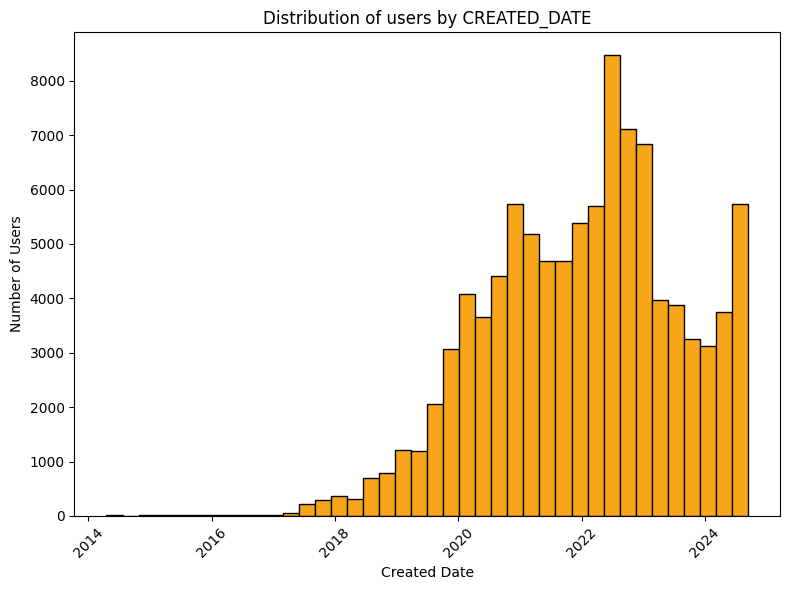

In [6]:
# User: CREATED_DATE
# Create a copy for User
User_copy = User.copy()
# Convert CREATED_DATE to datetime format
User_copy['CREATED_DATE'] = pd.to_datetime(User_copy['CREATED_DATE'])

# Create a histogram to show the distribution of users' CREATED_DATE
# Fetch logo color reference: https://logotyp.us/logo/fetch-rewards/
plt.figure(figsize=(8, 6))
plt.hist(User_copy['CREATED_DATE'].dt.date, bins=40, color='#f8a619', edgecolor='black')
plt.title('Distribution of users by CREATED_DATE')
plt.xlabel('Created Date')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()

## Show the plot
plt.show()

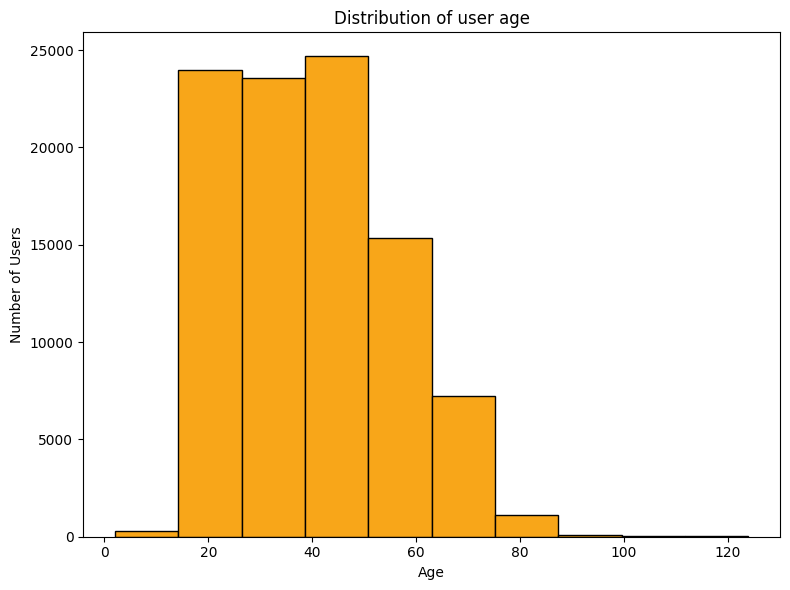

In [7]:
# User: BIRTH_DATE
# import datetime
from datetime import datetime

# Convert BIRTH_DATE to datetime
User_copy['BIRTH_DATE'] = pd.to_datetime(User_copy['BIRTH_DATE'])

# Calculate AGE for each users
User_copy['AGE'] = datetime.now().year - User_copy['BIRTH_DATE'].dt.year

# Create a histogram to show the distribution of user age
plt.figure(figsize=(8, 6))
plt.hist(User_copy['AGE'], color='#f8a619', edgecolor='black')
plt.title('Distribution of user age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

STATE
TX         9028
FL         8921
CA         8589
NY         5703
unknown    4812
IL         3794
GA         3718
PA         3644
OH         3519
NC         3399
NJ         2899
MI         2582
VA         2400
IN         2213
TN         2165
AL         1792
SC         1773
KY         1731
AZ         1728
MO         1652
MD         1636
MA         1523
WI         1389
PR         1361
LA         1290
WA         1234
CO         1139
MN         1125
CT         1110
OK         1100
AR         1011
MS          960
IA          933
NV          837
KS          835
OR          700
WV          674
UT          593
DE          492
NE          487
NM          452
ME          368
NH          359
HI          350
ID          350
AK          297
RI          284
DC          241
SD          205
ND          185
MT          169
WY          138
VT          111
Name: count, dtype: int64


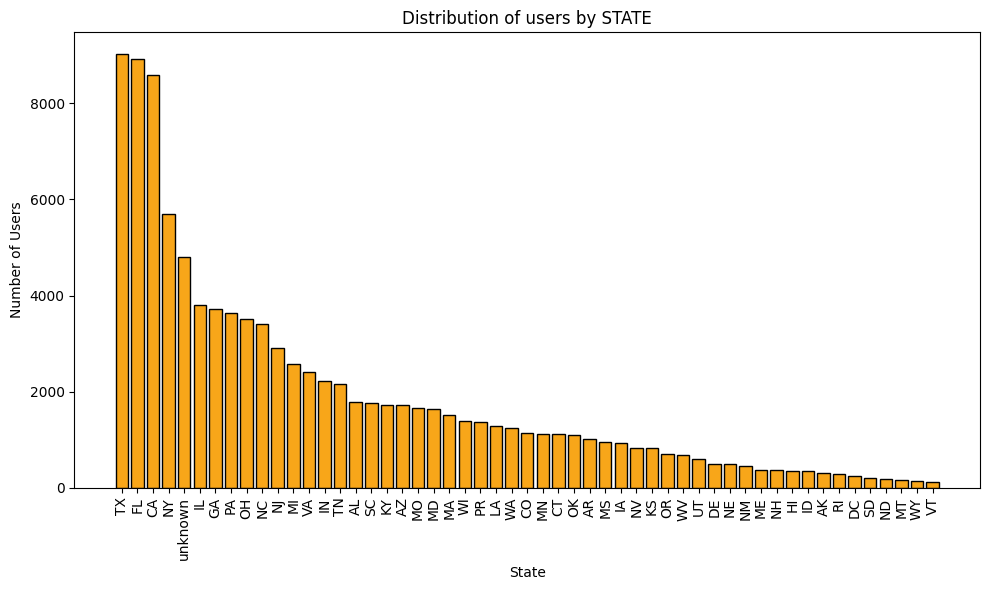

In [8]:
# User: STATE
# Assuming the null values are unknown
User_copy['STATE'] = User_copy['STATE'].fillna('unknown')

# Calculate the number of users in each state
state_counts = User_copy['STATE'].value_counts()
print(state_counts)

# Create a bar chart to show the distribution of users by STATE
# Compare to the real population distribution: https://worldpopulationreview.com/states
# The rank of numbers of users in each state shows in User dataset shows consistency comparing with the real population in each states.
# The reason for this comparison is to identify any outliers. 
## For example, if one state has many Fetch users but a relatively small population, this could indicate an outlier, or it could also imply this data is incomplete.
plt.figure(figsize=(10, 6))
plt.bar(state_counts.index, state_counts.values, color='#f8a619', edgecolor='black')
plt.title('Distribution of users by STATE')
plt.xlabel('State')
plt.ylabel('Number of Users')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

LANGUAGE
en         63403
unknown    30508
es-419      6089
Name: count, dtype: int64


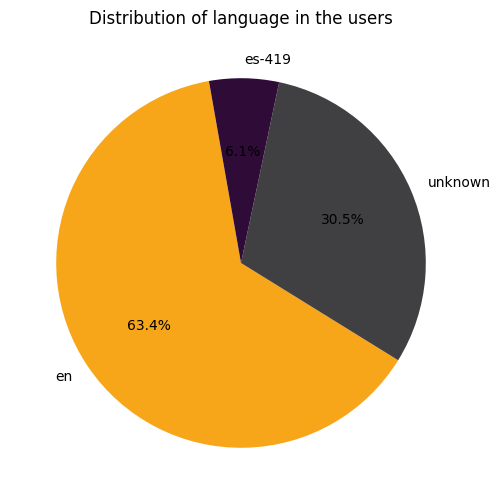

In [9]:
# User: LANGUAGE
# Assuming the null values are unknown
User_copy['LANGUAGE'] = User_copy['LANGUAGE'].fillna('unknown')

# Count the occurrences of each language
language_counts = User_copy['LANGUAGE'].value_counts()
print(language_counts) # en refers to English, and es-419 refers to Spanish 

# Use the Fetch logo colors 
colors = ['#f8a619', '#403f41', '#2f0c38']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=100, colors=colors)
plt.title('Distribution of language in the users')

# Show the plot
plt.show()

GENDER
female                    64240
male                      25829
unknown                    6088
transgender                1772
prefer_not_to_say          1350
non_binary                  473
not_listed                  180
Non-Binary                   34
not_specified                28
My gender isn't listed        5
Prefer not to say             1
Name: count, dtype: int64


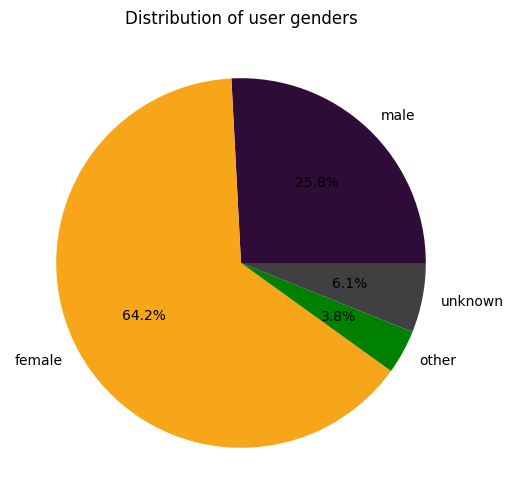

In [10]:
# User: GENDER
# Assuming the null values are unknown
User_copy['GENDER'] = User_copy['GENDER'].fillna('unknown')

# Count the occurrences of each gender
gender_counts = User_copy['GENDER'].value_counts()
print(gender_counts)

# Group all types except 'male' and 'female' into 'Other'
gender_counts['other'] = gender_counts.drop(['male', 'female', 'unknown']).sum()
gender_counts = gender_counts[['male', 'female', 'other', 'unknown']]

# Define the colors
colors = ['#2f0c38', '#f8a619', '#008000', '#403f41']

## Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=0, colors=colors)
plt.title('Distribution of user genders')

## Show the plot
plt.show()

### Overview - Transaction

#### Data quality issues in Transaction:
1. Missing values: There are missing values in 'BARCODE,' making it difficult to ascertain product information.
2. Data type issues: 'BARCODE', 'FINAL_SALE', 'FINAL_QUANTITY' should be treated as different data types:
    - 'BARCODE' should be treated as a string since it serves as an identifier and will not be used for calculations.
    - 'FINAL_SALE' and 'FINAL_QUANTITY' should be treated as numeric data types because these values will be used in calculations.
3. Inconsistent variable name with Entity-Relationship Model(ERD): The ERD refers to 'sale' and 'quantity,' while the actual data uses 'FINAL_SALE' and 'FINAL_QUANTITY,' leading to potential confusion.
4. Duplicate values: There are 171 duplicate values show in Transaction dataset
5. Data entry issue: 'FINAL_QUANTITY' & 'FINAL_SALE'
    - In 'FINAL_QUANTITY,' some rows display 'zero' as a string, which could cause errors during calculations.
    - In 'FINAL_SALE,' some rows contain a space (' '), which is ambiguous as it is unclear whether this represents an entry error, a missing value, or zero.

In [11]:
# Quick look of Transaction
Transaction.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [12]:
# Check the data type and non-null values
Transaction.info()
# Missing values show in 'BARCODE'
# Data type issues:
## 1. BARCODE should be treated as object, since BARCODE is the identifier and will not be used for calculations (even though it shows interger type on ERD)
## 2. FINAL_QUANTITY and FINAL_SALE should be treated as numeric data type
## 3. The field name: FINAL_QUANTITY and FINAL_SALE is not consistent with the ERD

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


In [13]:
# Transaction: RECEIPT_ID
# Create a copy for Transaction
Transaction_copy = Transaction.copy() 

# Calculate the unique number of RECEIPT_IDs
print(Transaction_copy['RECEIPT_ID'].nunique()) # There are only 24440 unique RECEIPT_ID, while in Transation there are 50000 RECEIPT_ID entries

# Check if there are duplicates
print(Transaction_copy.duplicated().sum()) # There are 171 duplicates

# Drop duplicate rows
Transaction_copy = Transaction_copy.drop_duplicates()
Transaction_copy.info()

24440
171
<class 'pandas.core.frame.DataFrame'>
Index: 49829 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      49829 non-null  object 
 1   PURCHASE_DATE   49829 non-null  object 
 2   SCAN_DATE       49829 non-null  object 
 3   STORE_NAME      49829 non-null  object 
 4   USER_ID         49829 non-null  object 
 5   BARCODE         44094 non-null  float64
 6   FINAL_QUANTITY  49829 non-null  object 
 7   FINAL_SALE      49829 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.4+ MB


This Transaction dataset purchase date is from 2024-06-12 00:00:00 to 2024-09-08 00:00:00
This Transaction dataset scan date is from 2024-06-12 06:36:34.910000+00:00 to 2024-09-08 23:07:19.836000+00:00


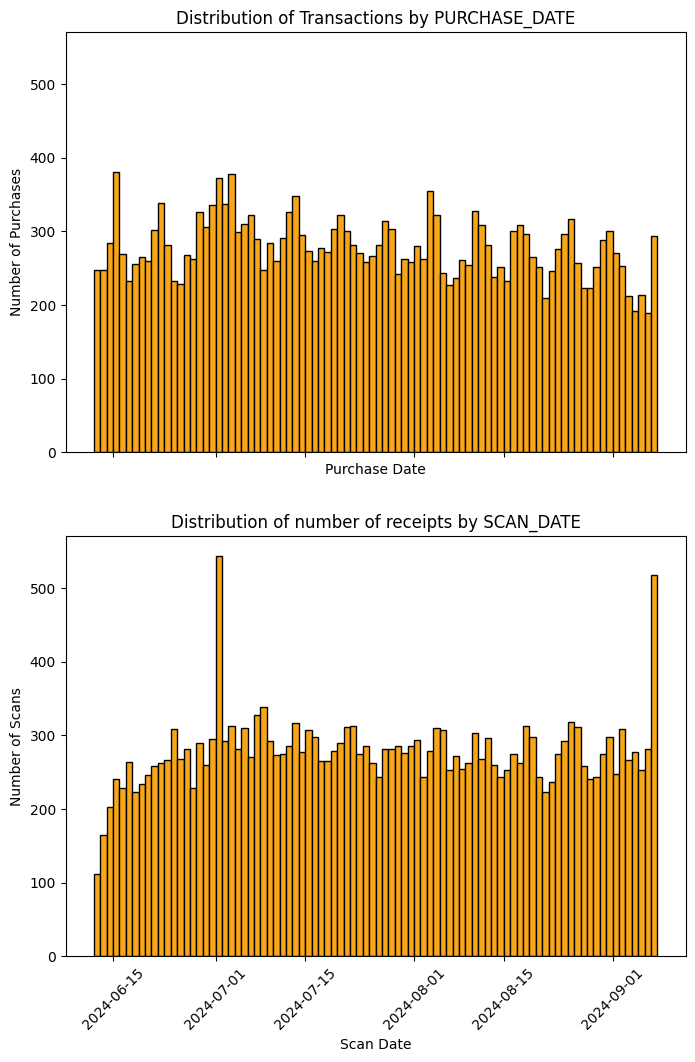

In [14]:
# Transaction: PURCHASE_DATE
# Convert PURCHASE_DATE and SCAN_DATE to datetime format
Transaction_copy['PURCHASE_DATE'] = pd.to_datetime(Transaction_copy['PURCHASE_DATE'])
Transaction_copy['SCAN_DATE'] = pd.to_datetime(Transaction_copy['SCAN_DATE'])

# Create a new Transaction_copy to drop duplicates based on RECEIPT_ID, because I will count the occurrences for transactions
# We keep Transaction_copy because it is possible that the same RECEIPT_ID show different BARCODE, which will be checked later
Transaction_copy_2 = Transaction_copy.drop_duplicates(subset='RECEIPT_ID')

# Set up the subplots size and axis
fig, axs = plt.subplots(2, 1, figsize=(8, 12), sharex=True, sharey=True)

# Check the PURCHASE_DATE date for Transaction data
purchase_start_date = Transaction_copy_2['PURCHASE_DATE'].min()
purchase_end_date = Transaction_copy_2['PURCHASE_DATE'].max()
print(f'This Transaction dataset purchase date is from {purchase_start_date} to {purchase_end_date}')

# Calculate the number of days from the first purchase to last one 
purchase_num_days = (purchase_end_date - purchase_start_date).days
# Create a histogram to show the distribution of transactions by PURCHASE_DATE
axs[0].hist(Transaction_copy_2['PURCHASE_DATE'].dt.date, bins=purchase_num_days, color='#f8a619', edgecolor='black')
axs[0].set_title('Distribution of Transactions by PURCHASE_DATE')
axs[0].set_xlabel('Purchase Date')
axs[0].set_ylabel('Number of Purchases')
axs[0].tick_params(axis='x', rotation=45)

# Check the SCAN_DATE date for Transaction data
scan_start_date = Transaction_copy_2['SCAN_DATE'].min()
scan_end_date = Transaction_copy_2['SCAN_DATE'].max()
print(f'This Transaction dataset scan date is from {scan_start_date} to {scan_end_date}')

# Calculate the number of days from the first scan to last one 
scan_num_days = (scan_end_date - scan_start_date).days
# Create a histogram to show the distribution of transactions by SCAN_DATE
axs[1].hist(Transaction_copy_2['SCAN_DATE'].dt.date, bins=scan_num_days, color='#f8a619', edgecolor='black')
axs[1].set_title('Distribution of number of receipts by SCAN_DATE')
axs[1].set_xlabel('Scan Date')
axs[1].set_ylabel('Number of Scans')
axs[1].tick_params(axis='x', rotation=45)

## Show the plot
plt.show()


In [15]:
# Transaction: STORE_NAME
Transaction_copy['STORE_NAME'].unique()

# Check the top 10 stores which have most receipts scanned
Transaction_copy.groupby('STORE_NAME')['RECEIPT_ID'].nunique().sort_values(ascending=False).head(10)

STORE_NAME
WALMART                   10347
DOLLAR GENERAL STORE       1360
ALDI                       1278
TARGET                      739
KROGER                      725
DOLLAR TREE STORES INC      610
PUBLIX                      584
CVS                         579
MEIJER                      576
WALGREENS                   559
Name: RECEIPT_ID, dtype: int64

In [16]:
# Transaction: FINAL_QUANTITY
# Check the quantity entries are all numbers
unique_final_quantity_values = Transaction_copy['FINAL_QUANTITY'].unique()
print(unique_final_quantity_values) ## string:'zero': shows in FINAL_QUANTITY

# Save the transactions which have 'zero' quantity in FINAL_QUANTITY as 'zero_quantity'
zero_quantity = Transaction_copy[Transaction['FINAL_QUANTITY'] == 'zero']

# Check if 'zero_quantity' are all have duplicate enties
transactions_with_zero_quantity = Transaction_copy[Transaction_copy['RECEIPT_ID'].isin(zero_quantity['RECEIPT_ID'])]
receipt_counts = transactions_with_zero_quantity.groupby(['RECEIPT_ID', 'BARCODE']).size()

# Check if all counts are at least 2
at_least_twice = (receipt_counts >= 2).all()

## Show the results
print("Occurrences of each RECEIPT_ID:\n", receipt_counts)
print("All RECEIPT_IDs occur at least twice:", at_least_twice) # TRUE. It might implies there are some data entry issues

## According to ERD, FINAL_QUANTITY should be numeric, but shows 'zero', which is a string.
## This might cause some inconsistent and calculation issues when doing calculations.
## Also, if the FINAL_QUANTITY is 0, then the data might be redundant.
## Group by same RECEIPT_ID and BARCODE, those transaction with 'zero' quantity record also shows duplicate in RECEIPT_ID

['1.00' 'zero' '2.00' '3.00' '4.00' '4.55' '2.83' '2.34' '0.46' '7.00'
 '18.00' '12.00' '5.00' '2.17' '0.23' '8.00' '1.35' '0.09' '2.58' '1.47'
 '16.00' '0.62' '1.24' '1.40' '0.51' '0.53' '1.69' '6.00' '2.39' '2.60'
 '10.00' '0.86' '1.54' '1.88' '2.93' '1.28' '0.65' '2.89' '1.44' '2.75'
 '1.81' '276.00' '0.87' '2.10' '3.33' '2.54' '2.20' '1.93' '1.34' '1.13'
 '2.19' '0.83' '2.61' '0.28' '1.50' '0.97' '0.24' '1.18' '6.22' '1.22'
 '1.23' '2.57' '1.07' '2.11' '0.48' '9.00' '3.11' '1.08' '5.53' '1.89'
 '0.01' '2.18' '1.99' '0.04' '2.25' '1.37' '3.02' '0.35' '0.99' '1.80'
 '3.24' '0.94' '2.04' '3.69' '0.70' '2.52' '2.27']
Occurrences of each RECEIPT_ID:
 RECEIPT_ID                            BARCODE     
000239aa-3478-453d-801e-66a82e39c8af  7.833997e+11    2
0002d8cd-1701-4cdd-a524-b70402e2dbc0  6.811314e+11    2
00096c49-8b04-42f9-88ce-941c5e06c4a7  7.830007e+10    2
0019ec79-cbb3-41ed-b84c-cd74d04553f8  5.150025e+10    2
001f2f3f-1746-4217-a98f-73c63c63bae2  4.600029e+10    2
           

/var/folders/k5/p6mtc1q551jcsw8bjjh9smqc0000gn/T/ipykernel_88674/87576166.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zero_quantity = Transaction_copy[Transaction['FINAL_QUANTITY'] == 'zero']


In [17]:
# Transaction: FINAL_SALE
final_sale_index = Transaction_copy['FINAL_SALE'].unique()
# check the index
final_sale_index

# Some rows in 'FINAL_SALE' shows ' ', which is confusing because I am not sure if it is entry error or missing value or 0

array([' ', '1.49', '3.49', ..., '11.02', '20.17', '42.38'], dtype=object)

In [18]:
# Assume that the following data entries are redundant so should be cleaned
## FINAL_QUANTITY = 'zero'
## FINAL_SALE = ' ' or '0.00'

# Define the filter condition
filter_condition = (Transaction_copy['FINAL_QUANTITY'] != 'zero') & (Transaction_copy['FINAL_SALE'] != ' ') & (Transaction_copy['FINAL_SALE'] != '0.00')

# Create a new DataFrame: Transaction_filtered using the filter condition
Transaction_2 = Transaction_copy[filter_condition]

# Check Transaction_filtered information
Transaction_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24538 entries, 25000 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   RECEIPT_ID      24538 non-null  object             
 1   PURCHASE_DATE   24538 non-null  datetime64[ns]     
 2   SCAN_DATE       24538 non-null  datetime64[ns, UTC]
 3   STORE_NAME      24538 non-null  object             
 4   USER_ID         24538 non-null  object             
 5   BARCODE         21882 non-null  float64            
 6   FINAL_QUANTITY  24538 non-null  object             
 7   FINAL_SALE      24538 non-null  object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(1), object(5)
memory usage: 1.7+ MB


### Overview - Product

#### Data quality issues in Product:
1. Missing values: There are missing values in 'CATEGORY_3', 'CATEGORY_4', 'MANUFACTURER', 'BRAND'
2. Duplicate values: There are 215 rows is completely duplicated in Product
3. Data entry issue: Multiple companies may share the same BRAND names, leading to potential misunderstandings. For example, 'DOVE' refers to both the body soap brand and the Dove chocolate brand.

In [19]:
# Quick look of Product data
Product.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [20]:
# Check the data type and non-null values
Product.info()
# Missing values show in (CATEGORY_3, CATEGORY_4, MANUFACTURER, BRAND)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


In [21]:
# Create a copy for Product
Product_copy = Product.copy()

# Check if Product have duplicate
Product_copy.duplicated().sum() # There are 215 Product infomation is duplicated

# Drop duplicate rows
Product_copy = Product_copy.drop_duplicates()
print(f'If all of the duplicates rows in Product_copy are dropped: {Product_copy.duplicated().sum() == 0}')

# Take a look
Product_copy.info()

If all of the duplicates rows in Product_copy are dropped: True
<class 'pandas.core.frame.DataFrame'>
Index: 845337 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845226 non-null  object 
 1   CATEGORY_2    843915 non-null  object 
 2   CATEGORY_3    784774 non-null  object 
 3   CATEGORY_4    67453 non-null   object 
 4   MANUFACTURER  618873 non-null  object 
 5   BRAND         618875 non-null  object 
 6   BARCODE       841369 non-null  float64
dtypes: float64(1), object(6)
memory usage: 51.6+ MB


In [22]:
# Fill the null values in 'BRAND' with 'unknown'
Product_copy['BRAND'] = Product_copy['BRAND'].fillna('unknown')
Product_copy.info()

# Create Product_2, which filter out the missing values from BARCODE
Product_2 = Product_copy[Product_copy['BARCODE'].isnull() == False]

<class 'pandas.core.frame.DataFrame'>
Index: 845337 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845226 non-null  object 
 1   CATEGORY_2    843915 non-null  object 
 2   CATEGORY_3    784774 non-null  object 
 3   CATEGORY_4    67453 non-null   object 
 4   MANUFACTURER  618873 non-null  object 
 5   BRAND         845337 non-null  object 
 6   BARCODE       841369 non-null  float64
dtypes: float64(1), object(6)
memory usage: 51.6+ MB


In [23]:
# Product: BRAND
# Check if brand name in Product dataset have integrity issues
# Group by 'BRAND' and calculate the number of unique 'CATEGORY_1' values
count_category_1_by_brand = Product_2.groupby('BRAND')['CATEGORY_1'].nunique()

# Convert the Series to a DataFrame, rename the column, sort values, and reset index
count_category_1_by_brand = count_category_1_by_brand.reset_index(name='count_category_1').sort_values('count_category_1', ascending=False)

# Create a new dataframe to save the brands which have multiple categories
brand_have_multiple_category = count_category_1_by_brand[count_category_1_by_brand['count_category_1'] != 1]

# Check how many brand have different categories of products
print(f'There are {len(brand_have_multiple_category)} brands have products in different categories')

There are 1113 brands have products in different categories


In [24]:
# While it is possible that the same brand have products in different categories
# Here I would like just use one example to show it is also possible that the same brand name actually show different company, which might cause some misunderstanding

# Check if products whose brand are 'DOVE' are from the same brand
print(Product_2['CATEGORY_1'][Product_2['BRAND'] == 'DOVE'].unique())

# Further check the product details
# Check what kind of Dove's products in 'Health & Wellness' caegory
print(Product_2[(Product_2['BRAND'] == 'DOVE') & (Product_2['CATEGORY_1'] == 'Health & Wellness')].head())

print('='*100)
# Check what kind of Dove's products in 'Snacks' caegory
print(Product_2[(Product_2['BRAND'] == 'DOVE') & (Product_2['CATEGORY_1'] == 'Snacks')].head())

# It turned out products whose brand name are 'DOVE' in different categories indicate different company. 
# This kind of integrity issues can possibly cause data integrity issues if we do not know that the same brand name can indicate different companies

['Health & Wellness' 'Snacks']
             CATEGORY_1   CATEGORY_2              CATEGORY_3 CATEGORY_4  \
77    Health & Wellness  Bath & Body    Hand Sanitizer Wipes        NaN   
93    Health & Wellness  Bath & Body  Bath Sponges & Loofahs        NaN   
201   Health & Wellness    Hair Care             Conditioner        NaN   
417   Health & Wellness    Hair Care             Conditioner        NaN   
1114  Health & Wellness    Hair Care             Conditioner        NaN   

     MANUFACTURER BRAND       BARCODE  
77       UNILEVER  DOVE  7.076382e+11  
93       UNILEVER  DOVE  1.004127e+11  
201      UNILEVER  DOVE  7.940048e+10  
417      UNILEVER  DOVE  7.940045e+10  
1114     UNILEVER  DOVE  5.455343e+11  
      CATEGORY_1 CATEGORY_2       CATEGORY_3 CATEGORY_4 MANUFACTURER BRAND  \
5323      Snacks      Candy  Chocolate Candy        NaN     UNILEVER  DOVE   
41308     Snacks      Candy  Chocolate Candy        NaN     UNILEVER  DOVE   
56111     Snacks      Candy  Chocolate Candy

In [25]:
# Quick explore on the number of different kinds of products
# Count the number of products based on their categories
category_counts = Product_2.groupby(['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4'])['BARCODE'].nunique()\
    .reset_index(name='Distinct Count').sort_values(by='Distinct Count', ascending=False)

# Show the top 10 result
category_counts.head(10)

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,Distinct Count
82,Health & Wellness,Skin Care,Lip Balms & Treatments,Lip Balms,9712
122,Snacks,Puffed Snacks,Popcorn,Already Popped Popcorn,6956
80,Health & Wellness,Medicines & Treatments,Sleeping & Snoring,Sleep Aids,4968
58,Health & Wellness,Hair Care,Hair Tools,Hair Brushes & Combs,4720
66,Health & Wellness,Hair Removal,Shaving Gel & Cream,Women's Shaving Gel & Cream,3871
62,Health & Wellness,Hair Removal,Razors,Men's Razors,2833
76,Health & Wellness,Medicines & Treatments,Digestive Health Medicines & Treatments,Heartburn & Antacids Medicines & Treatments,2747
74,Health & Wellness,Medicines & Treatments,Digestive Health Medicines & Treatments,Constipation Relief Medicines & Treatments,2733
70,Health & Wellness,Medicines & Treatments,Cough & Cold Medicines & Treatments,Immune Support,2675
123,Snacks,Puffed Snacks,Popcorn,Microwave Popcorn,2308


### 3 tables join to each other

#### Data quality issues:
1. Only 130 users match the Transaction dataset, indicating that most user information in the Transaction data is absent from the User dataset.

In [26]:
# Transaction & User
Transaction_User = pd.merge(Transaction_2, User_copy, left_on='USER_ID', right_on='ID')
Transaction_User.info()
# There are 100000 entries in User dataset, but merge with Transaction dataset, there are only 130 entries are matching.
# It implies that most of the user information in Transaction dataset is not provided in User dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   RECEIPT_ID      130 non-null    object             
 1   PURCHASE_DATE   130 non-null    datetime64[ns]     
 2   SCAN_DATE       130 non-null    datetime64[ns, UTC]
 3   STORE_NAME      130 non-null    object             
 4   USER_ID         130 non-null    object             
 5   BARCODE         119 non-null    float64            
 6   FINAL_QUANTITY  130 non-null    object             
 7   FINAL_SALE      130 non-null    object             
 8   ID              130 non-null    object             
 9   CREATED_DATE    130 non-null    datetime64[ns, UTC]
 10  BIRTH_DATE      129 non-null    datetime64[ns, UTC]
 11  STATE           130 non-null    object             
 12  LANGUAGE        130 non-null    object             
 13  GENDER          130 non-null    obj

In [27]:
# Transaction & Product
# Merge two data sets
Transaction_Product = pd.merge(Transaction_2, Product_2, how='left', on='BARCODE')
Transaction_Product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24540 entries, 0 to 24539
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   RECEIPT_ID      24540 non-null  object             
 1   PURCHASE_DATE   24540 non-null  datetime64[ns]     
 2   SCAN_DATE       24540 non-null  datetime64[ns, UTC]
 3   STORE_NAME      24540 non-null  object             
 4   USER_ID         24540 non-null  object             
 5   BARCODE         21884 non-null  float64            
 6   FINAL_QUANTITY  24540 non-null  object             
 7   FINAL_SALE      24540 non-null  object             
 8   CATEGORY_1      11934 non-null  object             
 9   CATEGORY_2      11922 non-null  object             
 10  CATEGORY_3      10972 non-null  object             
 11  CATEGORY_4      1480 non-null   object             
 12  MANUFACTURER    11912 non-null  object             
 13  BRAND           12277 non-null 

In [28]:
# Transaction & Product & User
Transaction_Product_User = pd.merge(Transaction_Product, User, left_on='USER_ID', right_on='ID')
Transaction_Product_User.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   RECEIPT_ID      130 non-null    object             
 1   PURCHASE_DATE   130 non-null    datetime64[ns]     
 2   SCAN_DATE       130 non-null    datetime64[ns, UTC]
 3   STORE_NAME      130 non-null    object             
 4   USER_ID         130 non-null    object             
 5   BARCODE         119 non-null    float64            
 6   FINAL_QUANTITY  130 non-null    object             
 7   FINAL_SALE      130 non-null    object             
 8   CATEGORY_1      72 non-null     object             
 9   CATEGORY_2      72 non-null     object             
 10  CATEGORY_3      66 non-null     object             
 11  CATEGORY_4      7 non-null      object             
 12  MANUFACTURER    69 non-null     object             
 13  BRAND           72 non-null     obj

# Second: provide SQL queries
In this section, I will use Spark sql and the data cleaned in section 1 to answer the following three questions.

* Closed-ended questions:
    - What are the top 5 brands by receipts scanned among users 21 and over?
    - What is the percentage of sales in the Health & Wellness category by generation?
* Open-ended questions: for these, make assumptions and clearly state them when answering the question.
    - Which is the leading brand in the Dips & Salsa category?

## pyspark.sql setting

In [29]:
# import pyspark and pyspark.sql
import pyspark
from pyspark.sql import SparkSession

In [30]:
# Create a Spark session with name as 'Fetch_take_home_assessment'
spark = SparkSession.builder \
    .appName('Fetch_take_home_assessment') \
    .getOrCreate()

# Confirm the Spark session is created
print('Spark session created:', spark)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/31 22:52:44 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Spark session created: <pyspark.sql.session.SparkSession object at 0x118c1a9d0>


## Data Loading
* Convert the pandas dataframe to a spark dataframe

In [31]:
# User
User_spark = spark.createDataFrame(User) 
User_spark.createOrReplaceTempView('User')

# Quick look for User in spark
spark.sql('''SELECT * 
          FROM User
          LIMIT 5''').show()

+--------------------+--------------------+--------------------+-----+--------+------+
|                  ID|        CREATED_DATE|          BIRTH_DATE|STATE|LANGUAGE|GENDER|
+--------------------+--------------------+--------------------+-----+--------+------+
|5ef3b4f17053ab141...|2020-06-24 20:17:...|2000-08-11 00:00:...|   CA|  es-419|female|
|5ff220d383fcfc126...|2021-01-03 19:53:...|2001-09-24 04:00:...|   PA|      en|female|
|6477950aa55bb77a0...|2023-05-31 18:42:...|1994-10-28 00:00:...|   FL|  es-419|female|
|658a306e99b40f103...|2023-12-26 01:46:...|                 NaN|   NC|      en|   NaN|
|653cf5d6a225ea102...|2023-10-28 11:51:...|1972-03-19 00:00:...|   PA|      en|female|
+--------------------+--------------------+--------------------+-----+--------+------+



In [32]:
# Transaction_2: 
# drop the duplicates, filter out ('FINAL_QUANTITY' = 'zero') and ()'FINAL_SALE' = ' ' or '0.00') from original 'Transaction' dataset
Transaction_spark = spark.createDataFrame(Transaction_2) 
Transaction_spark.createOrReplaceTempView('Transaction_2')

# Quick look for Transaction_2 in spark
spark.sql('''SELECT * 
          FROM Transaction_2
          LIMIT 5''').show()

+--------------------+-------------------+--------------------+--------------------+--------------------+----------------+--------------+----------+
|          RECEIPT_ID|      PURCHASE_DATE|           SCAN_DATE|          STORE_NAME|             USER_ID|         BARCODE|FINAL_QUANTITY|FINAL_SALE|
+--------------------+-------------------+--------------------+--------------------+--------------------+----------------+--------------+----------+
|7b3ec72d-9d30-40b...|2024-08-20 00:00:00|2024-08-20 07:17:...|DOLLAR GENERAL STORE|60fc1e6deb7585430...|7.45527114884E11|          1.00|      1.65|
|04869b68-29e3-4e8...|2024-08-05 00:00:00|2024-08-09 12:06:...|DOLLAR GENERAL STORE|654cf234a225ea102...|7.45527114884E11|          1.00|      1.65|
|f1a96308-24a5-46a...|2024-09-03 00:00:00|2024-09-03 07:28:...|             WALMART|63c1cb6d3d310dcee...| 3.7000828761E10|          1.00|     28.22|
|7ee1798e-fd2e-427...|2024-08-30 00:00:00|2024-09-04 08:53:...|DOLLAR GENERAL STORE|65c29b137050d0a62...| 

In [33]:
# Product_2:
# drop duplicates, filled missing value in 'BRAND' with 'unknown'
Product_spark = spark.createDataFrame(Product_2)
Product_spark.createOrReplaceTempView('Product_2')

# Quick look for Product_2 in spark
spark.sql('''SELECT * 
          FROM Product_2
          LIMIT 5''').show()

24/10/31 22:53:05 WARN TaskSetManager: Stage 2 contains a task of very large size (3854 KiB). The maximum recommended task size is 1000 KiB.


+-----------------+--------------------+--------------------+----------+--------------------+---------------+----------------+
|       CATEGORY_1|          CATEGORY_2|          CATEGORY_3|CATEGORY_4|        MANUFACTURER|          BRAND|         BARCODE|
+-----------------+--------------------+--------------------+----------+--------------------+---------------+----------------+
|Health & Wellness|       Sexual Health|Conductivity Gels...|       NaN|                 NaN|        unknown| 7.9649440782E11|
|           Snacks|       Puffed Snacks|Cheese Curls & Puffs|       NaN|                 NaN|        unknown| 2.3278011028E10|
|Health & Wellness|           Hair Care|Hair Care Accesso...|       NaN|PLACEHOLDER MANUF...|        ELECSOP|4.61817824225E11|
|Health & Wellness|           Oral Care|          Toothpaste|       NaN|   COLGATE-PALMOLIVE|        COLGATE| 3.5000466815E10|
|Health & Wellness|Medicines & Treat...|      Essential Oils|       NaN|MAPLE HOLISTICS A...|MAPLE HOLISTICS|8.

24/10/31 22:53:09 WARN PythonRunner: Detected deadlock while completing task 0.0 in stage 2 (TID 2): Attempting to kill Python Worker


### Closed-ended questions

#### What are the top 5 brands by receipts scanned among users 21 and over?
* There are some brands have the same number of receipt scanned
* NERDS CANDY, DOVE, COCA-COLA, MEIJER, TRIDENT, GREAT VALUE, SOUR PATCH KIDS, HERSHEY'S

In [34]:
# What are the top 5 brands by receipts scanned among users 21 and over? 
spark.sql('''
-- Select the Target_user who are 21 and over
WITH Target_user AS (
  SELECT 
    u1.id,
    CAST(DATEDIFF(current_date(), u1.birth_date) / 365 AS INT) AS age
  FROM 
    User u1
  WHERE 
    CAST(DATEDIFF(current_date(), u1.birth_date) / 365 AS INT) >= 21
), Ranked_Brands AS (
  SELECT 
    p.brand,
    COUNT(DISTINCT t.receipt_id) AS count_of_receipts,
    RANK() OVER (ORDER BY COUNT(DISTINCT t.receipt_id) DESC) AS brand_rank
  FROM 
    Transaction_2 t
  INNER JOIN 
    Target_user tu ON t.user_id = tu.id
  LEFT JOIN 
    Product_2 p ON t.barcode = p.barcode
  WHERE 
    p.brand IS NOT NULL
    AND p.brand <> 'unknown'
  GROUP BY 
    p.brand
)
SELECT 
  brand,
  count_of_receipts,
  brand_rank
FROM 
  Ranked_Brands
WHERE 
  brand_rank <= 5
ORDER BY 
  brand_rank;
''').show()

24/10/31 22:53:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/31 22:53:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/31 22:53:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/31 22:53:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/31 22:53:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/31 22:53:10 WARN TaskSetManager: Stage 5 contains a task of very large size (3853 KiB). The maximum recommended task size is 1000 KiB.
24/10/31 22:53:10 WARN WindowExec:

+---------------+-----------------+----------+
|          brand|count_of_receipts|brand_rank|
+---------------+-----------------+----------+
|    NERDS CANDY|                3|         1|
|           DOVE|                3|         1|
|      COCA-COLA|                2|         3|
|         MEIJER|                2|         3|
|        TRIDENT|                2|         3|
|    GREAT VALUE|                2|         3|
|SOUR PATCH KIDS|                2|         3|
|      HERSHEY'S|                2|         3|
+---------------+-----------------+----------+



24/10/31 22:53:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/31 22:53:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/31 22:53:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/31 22:53:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/31 22:53:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/31 22:53:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


#### What is the percentage of sales in the Health & Wellness category by generation?

In [35]:
# What is the percentage of sales in the Health & Wellness category by generation?
# Generation and age reference: https://www.beresfordresearch.com/age-range-by-generation/
spark.sql('''
-- Calculate users' age and categorize into generations
WITH Generation_group AS (
  SELECT 
    u.id,
    CASE
      WHEN u.age >= 12 AND u.age < 28 THEN 'Gen Z (12~28)'
      WHEN u.age >= 28 AND u.age < 44 THEN 'Millennials (28~44)'
      WHEN u.age >= 44 AND u.age < 60 THEN 'Gen X (44~60)'
      WHEN u.age >= 60 THEN 'Boomers (60up)'
    END AS generation
  FROM (
    SELECT 
      id,
      CAST(DATEDIFF(current_date(), birth_date) / 365 AS INT) AS age
    FROM User
  ) u
), 
-- Select products' barcode in Health & Wellness category_1
Product_in_Health_Wellness AS (
  SELECT p1.barcode
  FROM Product_2 p1
  WHERE p1.category_1 = 'Health & Wellness'
),
-- Join transactions with relevant products to filter only Health & Wellness sales and calculate sales by generation
Sales_by_Generation AS (
  SELECT 
    gg.generation,
    ROUND(SUM(t.FINAL_SALE), 2) AS generation_sales
  FROM Transaction_2 t
  INNER JOIN Product_in_Health_Wellness p ON t.barcode = p.barcode
  INNER JOIN Generation_group gg ON t.user_id = gg.id
  GROUP BY gg.generation
)
-- Calculate total sales and the percentage of total sales by generation
SELECT 
  generation,
  generation_sales,
  (SELECT ROUND(SUM(generation_sales), 2) FROM Sales_by_Generation) AS total_sales,
  CONCAT(ROUND((generation_sales / (SELECT SUM(generation_sales) FROM Sales_by_Generation)) * 100, 2), '%') AS percentage_of_sales
FROM 
  Sales_by_Generation
ORDER BY 
  (generation_sales / (SELECT SUM(generation_sales) FROM Sales_by_Generation)) DESC
''').show()

24/10/31 22:53:12 WARN TaskSetManager: Stage 28 contains a task of very large size (3853 KiB). The maximum recommended task size is 1000 KiB.


+-------------------+----------------+-----------+-------------------+
|         generation|generation_sales|total_sales|percentage_of_sales|
+-------------------+----------------+-----------+-------------------+
|     Boomers (60up)|           84.09|     159.54|             52.71%|
|      Gen X (44~60)|           40.28|     159.54|             25.25%|
|Millennials (28~44)|           35.17|     159.54|             22.04%|
+-------------------+----------------+-----------+-------------------+



### Open-ended questions
*  for these, make assumptions and clearly state them when answering the question.

#### Which is the leading brand in the Dips & Salsa category?
* For this question, I assume that a leading brand is defined as the one with the highest sales in the provided transaction dataset, covering the period from June 12, 2024, to September 8, 2024.
* The reason I use multiple CTE here instead of using LIMIT 1 is because it is possible that multiple brands have the same sales which might all be maximum. If using LIMIT 1, then there might be some brands missing by that. That's why the queries here can ensure to avoid this kind of mistakes.

In [36]:
# Which is the leading brand in the Dips & Salsa category?
spark.sql('''
-- Calculate the sales for each brand in 'Dip & Salsa' category
WITH Dip_Salsa_sales AS (
    SELECT 
        p.brand, 
        ROUND(SUM(t.FINAL_SALE), 2) AS total_sale
    FROM 
        Transaction_2 t 
    LEFT JOIN 
        Product_2 p ON t.barcode = p.barcode
    WHERE 
        p.category_2 = 'Dips & Salsa'
        AND p.brand <> 'unknown'
    GROUP BY 
        p.brand
),
-- Select the max sale from Dip_Salsa_sales
Max_Sale AS (
    SELECT 
        MAX(total_sale) AS max_sale
    FROM 
        Dip_Salsa_sales
)
-- Select all brands with total sales equal to the maximum found total sales
SELECT 
    d.brand,
    d.total_sale
FROM 
    Dip_Salsa_sales d, Max_Sale ms
WHERE d.total_sale = ms.max_sale;
''').show()

24/10/31 22:53:14 WARN TaskSetManager: Stage 53 contains a task of very large size (3853 KiB). The maximum recommended task size is 1000 KiB.


+--------+----------+
|   brand|total_sale|
+--------+----------+
|TOSTITOS|     181.3|
+--------+----------+



# Third: communicate with stakeholders
* In this section, I will share an interesting trend regarding "DOVE," one brand in the Health & Wellness category.
* Specifically, I noticed that Dove's total sales and average daily sales performed outstandingly in July. I would like to share this trend along with deeper findings about the products and request additional help to make this data more meaningful and uncover further insights.
* I assume that the product lead (Adam) I am emailing serves as the bridge between Fetch and Dove. This product lead regularly reports on how users purchase Dove's products and how our offers support their sales and marketing goals. As we prepare to renew the contract with Dove next January, the primary purpose of this communication is to provide insights that will support the negotiation and foster our collaborative relationship with Dove.
* The following queries illustrate the process for identifying the trend and gathering necessary data. For the complete email, please refer to "Third: (Email) Communicate with Stakeholders.md."

In [45]:
# Calculate the total sale and average daily sale for 'DOVE'(Health & Wellness) to see the trend
spark.sql('''
WITH Dove_sale AS (
    SELECT 
        p.brand, 
        date_format(t.PURCHASE_DATE, 'yyyy-MM') AS purchase_month,
        ROUND(SUM(t.FINAL_SALE), 2) AS total_sale
    FROM 
        Transaction_2 t 
    LEFT JOIN 
        Product_2 p ON t.barcode = p.barcode
    WHERE 
        p.category_1 = 'Health & Wellness'
        AND p.brand = 'DOVE'
    GROUP BY 
        p.brand, 
        date_format(t.purchase_date, 'yyyy-MM')
)
SELECT
    ds.brand,
    ds.purchase_month,
    ds.total_sale,
    CASE 
        WHEN ds.purchase_month = '2024-06' THEN ROUND(ds.total_sale / 19, 2) -- Since the transaction data is from June 12
        WHEN ds.purchase_month = '2024-09' THEN ROUND(ds.total_sale / 8, 2) -- Since the transaction data is unitl Sep 08
        ELSE ROUND(ds.total_sale / 30, 2)  -- For July & August
    END AS avg_daily_sale
FROM 
    Dove_sale ds
ORDER BY 
    ds.purchase_month ASC;
''').show()

24/11/01 12:33:56 WARN TaskSetManager: Stage 141 contains a task of very large size (3853 KiB). The maximum recommended task size is 1000 KiB.


+-----+--------------+----------+--------------+
|brand|purchase_month|total_sale|avg_daily_sale|
+-----+--------------+----------+--------------+
| DOVE|       2024-06|    269.28|         14.17|
| DOVE|       2024-07|    548.72|         18.29|
| DOVE|       2024-08|    236.02|          7.87|
| DOVE|       2024-09|     62.36|           7.8|
+-----+--------------+----------+--------------+



In [38]:
# Check in each month, what are the popular products?
spark.sql('''
WITH Dove_sale_Category AS (
    SELECT 
        p.category_2,
        p.category_3,
        p.category_4,
        date_format(t.purchase_date, 'yyyy-MM') AS purchase_month,
        ROUND(SUM(t.final_sale), 2) AS total_sale,
        ROUND(COUNT(t.receipt_id), 2) AS count_of_receipt
    FROM 
        Transaction_2 t 
    LEFT JOIN 
        Product_2 p ON t.barcode = p.barcode
    WHERE 
        p.category_1 = 'Health & Wellness'
        AND p.brand = 'DOVE'
    GROUP BY 
        p.category_2, 
        p.category_3, 
        p.category_4, 
        date_format(t.purchase_date, 'yyyy-MM')
)
SELECT *
FROM 
    Dove_sale_Category
WHERE 
    count_of_Receipt > 1 -- Filter out those have 0 or only have 1 count of sale
ORDER BY 
    purchase_month ASC, 
    count_of_receipt DESC,
    total_sale DESC
''').show(100)

24/10/31 22:53:15 WARN TaskSetManager: Stage 78 contains a task of very large size (3853 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+--------------------+----------+--------------+----------+----------------+
|          category_2|          category_3|category_4|purchase_month|total_sale|count_of_receipt|
+--------------------+--------------------+----------+--------------+----------+----------------+
|         Bath & Body|           Body Wash|       NaN|       2024-06|    141.18|              13|
|Deodorant & Antip...|Women's Deodorant...|       NaN|       2024-06|     60.78|              10|
|         Bath & Body|            Bar Soap|       NaN|       2024-06|     30.93|               6|
|Deodorant & Antip...|                 NaN|       NaN|       2024-06|     11.98|               2|
|           Hair Care|             Shampoo|       NaN|       2024-06|     11.96|               2|
|         Bath & Body|            Bar Soap|       NaN|       2024-07|    234.51|              25|
|         Bath & Body|           Body Wash|       NaN|       2024-07|    156.57|              18|
|Deodorant & Antip..

In [56]:
# Body Wash
spark.sql('''
WITH Body_Wash_Sale AS (
    SELECT 
        p.category_2,
        p.category_3,
        p.category_4,
        p.brand,
        date_format(t.purchase_date, 'yyyy-MM') AS purchase_month,
        ROUND(SUM(t.final_sale), 2) AS total_sale,
        ROUND(COUNT(t.receipt_id), 2) AS count_of_sale
    FROM 
        Transaction_2 t 
    LEFT JOIN 
        Product_2 p ON t.barcode = p.barcode
    WHERE 
        p.category_1 = 'Health & Wellness'
          AND p.category_2 = 'Bath & Body'
          AND p.category_3 = 'Body Wash'
    GROUP BY 
        p.category_2, 
        p.category_3, 
        p.category_4, 
        p.brand,
        date_format(t.purchase_date, 'yyyy-MM')
)
SELECT *
FROM 
    Body_Wash_Sale
WHERE 
    count_of_sale > 2 -- Filter out those have less than 2 count of sale
ORDER BY 
    purchase_month ASC,
    total_sale DESC
''').show(50)

24/11/01 13:50:23 WARN TaskSetManager: Stage 222 contains a task of very large size (3853 KiB). The maximum recommended task size is 1000 KiB.


+-----------+----------+----------+-------------+--------------+----------+-------------+
| category_2|category_3|category_4|        brand|purchase_month|total_sale|count_of_sale|
+-----------+----------+----------+-------------+--------------+----------+-------------+
|Bath & Body| Body Wash|       NaN|         DOVE|       2024-06|    141.18|           13|
|Bath & Body| Body Wash|       NaN|    OLD SPICE|       2024-06|     64.21|            9|
|Bath & Body| Body Wash|       NaN|         OLAY|       2024-06|     31.85|            3|
|Bath & Body| Body Wash|       NaN|     SOFTSOAP|       2024-06|     21.19|            4|
|Bath & Body| Body Wash|       NaN|        NIVEA|       2024-06|     17.22|            4|
|Bath & Body| Body Wash|       NaN|        SUAVE|       2024-06|      8.91|            3|
|Bath & Body| Body Wash|       NaN|         DOVE|       2024-07|    156.57|           18|
|Bath & Body| Body Wash|       NaN|         OLAY|       2024-07|     60.94|            5|
|Bath & Bo

In [40]:
# Bar Soap
spark.sql('''
WITH Bar_Soap_Sale AS (
    SELECT 
        p.category_2,
        p.category_3,
        p.category_4,
        p.BRAND,
        date_format(t.purchase_date, 'yyyy-MM') AS purchase_month,
        ROUND(SUM(t.final_sale), 2) AS total_sale,
        ROUND(COUNT(t.receipt_id), 2) AS count_of_sale
    FROM 
        Transaction_2 t 
    LEFT JOIN 
        Product_2 p ON t.barcode = p.barcode
    WHERE 
        p.category_1 = 'Health & Wellness'
          AND p.category_2 = 'Bath & Body'
          AND p.category_3 = 'Bar Soap'
    GROUP BY 
        p.category_2, 
        p.category_3, 
        p.category_4, 
        p.brand,
        date_format(t.purchase_date, 'yyyy-MM')
)
SELECT *
FROM 
    Bar_Soap_Sale
WHERE 
    count_of_sale <> 1 -- Filter out those only have 1 count of sale
ORDER BY 
    purchase_month ASC, 
    total_sale DESC
''').show(30)

24/10/31 22:53:16 WARN TaskSetManager: Stage 96 contains a task of very large size (3853 KiB). The maximum recommended task size is 1000 KiB.


+-----------+----------+----------+------------+--------------+----------+-------------+
| category_2|category_3|category_4|       BRAND|purchase_month|total_sale|count_of_sale|
+-----------+----------+----------+------------+--------------+----------+-------------+
|Bath & Body|  Bar Soap|       NaN|        DOVE|       2024-06|     30.93|            6|
|Bath & Body|  Bar Soap|       NaN|        DIAL|       2024-06|     13.36|            3|
|Bath & Body|  Bar Soap|       NaN|        DOVE|       2024-07|    234.51|           25|
|Bath & Body|  Bar Soap|       NaN|      CARESS|       2024-07|      6.42|            2|
|Bath & Body|  Bar Soap|       NaN|        DOVE|       2024-08|     79.62|            9|
|Bath & Body|  Bar Soap|       NaN|        DIAL|       2024-08|     27.92|            7|
|Bath & Body|  Bar Soap|       NaN|IRISH SPRING|       2024-08|     17.08|            2|
|Bath & Body|  Bar Soap|       NaN|      CARESS|       2024-08|     12.67|            3|
|Bath & Body|  Bar So

In [41]:
# Women Deodorant
spark.sql('''
WITH Women_Deodorant AS (
    SELECT 
        p.category_2,
        p.category_3,
        p.category_4,
        p.brand,
        date_format(t.purchase_date, 'yyyy-MM') AS purchase_month,
        ROUND(SUM(t.final_sale), 2) AS total_sale,
        ROUND(COUNT(t.receipt_id), 2) AS count_of_sale
    FROM 
        Transaction_2 t 
    LEFT JOIN 
        Product_2 p ON t.barcode = p.barcode
    WHERE 
        p.category_1 = 'Health & Wellness'
          AND p.category_2 = 'Deodorant & Antiperspirant'
          AND p.category_3 = "Women's Deodorant & Antiperspirant"
    GROUP BY 
        p.category_2, 
        p.category_3, 
        p.category_4, 
        p.brand,
        date_format(t.purchase_date, 'yyyy-MM')
)
SELECT *
FROM 
    Women_Deodorant
WHERE 
    count_of_sale <> 1 -- Filter out those only have 1 count of sale
ORDER BY 
    purchase_month ASC, 
    total_sale DESC
''').show(30)

24/10/31 22:53:17 WARN TaskSetManager: Stage 105 contains a task of very large size (3853 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+--------------------+----------+-------------+--------------+----------+-------------+
|          category_2|          category_3|category_4|        brand|purchase_month|total_sale|count_of_sale|
+--------------------+--------------------+----------+-------------+--------------+----------+-------------+
|Deodorant & Antip...|Women's Deodorant...|       NaN|         DOVE|       2024-06|     60.78|           10|
|Deodorant & Antip...|Women's Deodorant...|       NaN|       SECRET|       2024-06|     45.26|            7|
|Deodorant & Antip...|Women's Deodorant...|       NaN|    OLD SPICE|       2024-06|     27.66|            4|
|Deodorant & Antip...|Women's Deodorant...|       NaN|     GILLETTE|       2024-06|     16.96|            2|
|Deodorant & Antip...|Women's Deodorant...|       NaN|       DEGREE|       2024-06|      9.26|            2|
|Deodorant & Antip...|Women's Deodorant...|       NaN|        SUAVE|       2024-06|      8.43|            4|
|Deodorant & Antip.